### 3/21/17

When baking the chamber we measured the waist and relative power in the sidebands. Calculations below.

### Sidebands

### 493nm

<IPython.core.display.Javascript object>


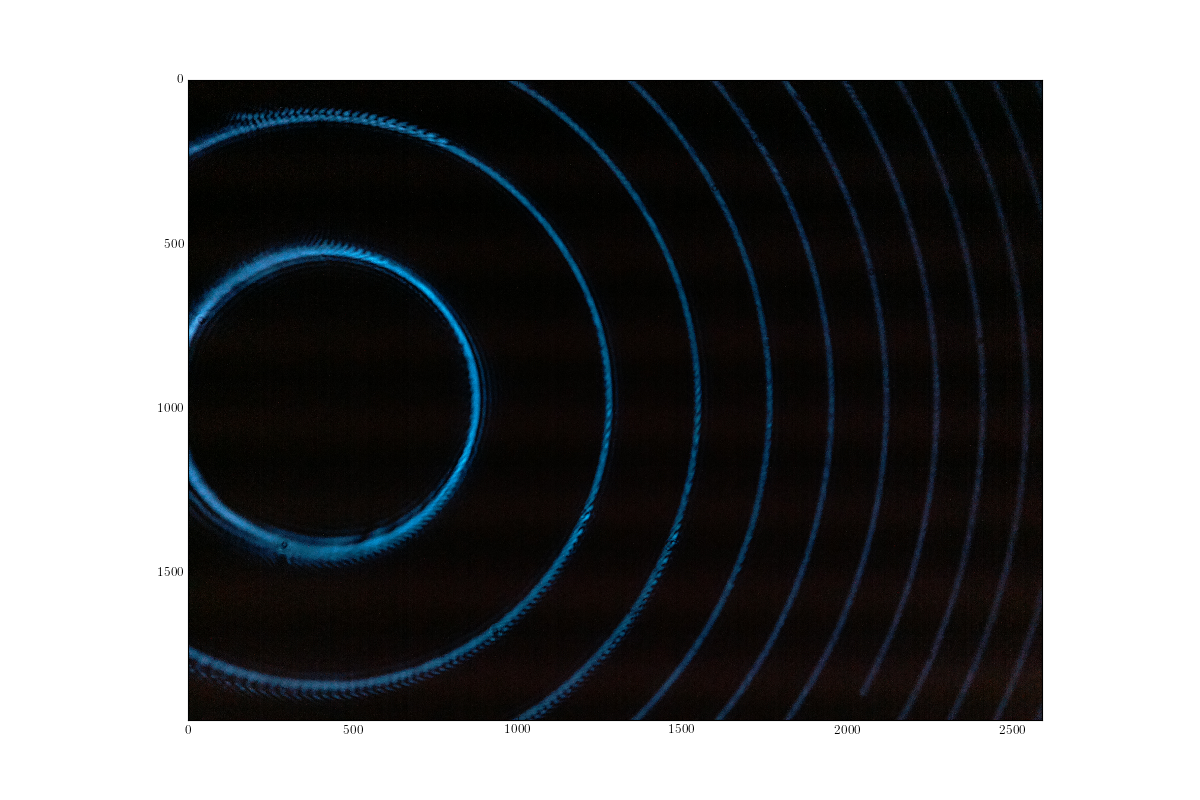

In [30]:
# Read in the etalon images and convert to matrices. 
from PIL import Image
% matplotlib notebook
rcParams["figure.figsize"] = 15, 10
carrier = Image.open('Z:/Group_Share/Barium/Data/etalon_image/493/carrier.png')

fourG = Image.open('Z:/Group_Share/Barium/Data/etalon_image/493/4GHz.png')
sixG = Image.open('Z:/Group_Share/Barium/Data/etalon_image/493/6GHz.png')
both = Image.open('Z:/Group_Share/Barium/Data/etalon_image/493/both.png')


carrier = np.array(carrier)
fourG = np.array(fourG)
sixG = np.array(sixG)
both = np.array(both)

imshow(carrier)

<IPython.core.display.Javascript object>


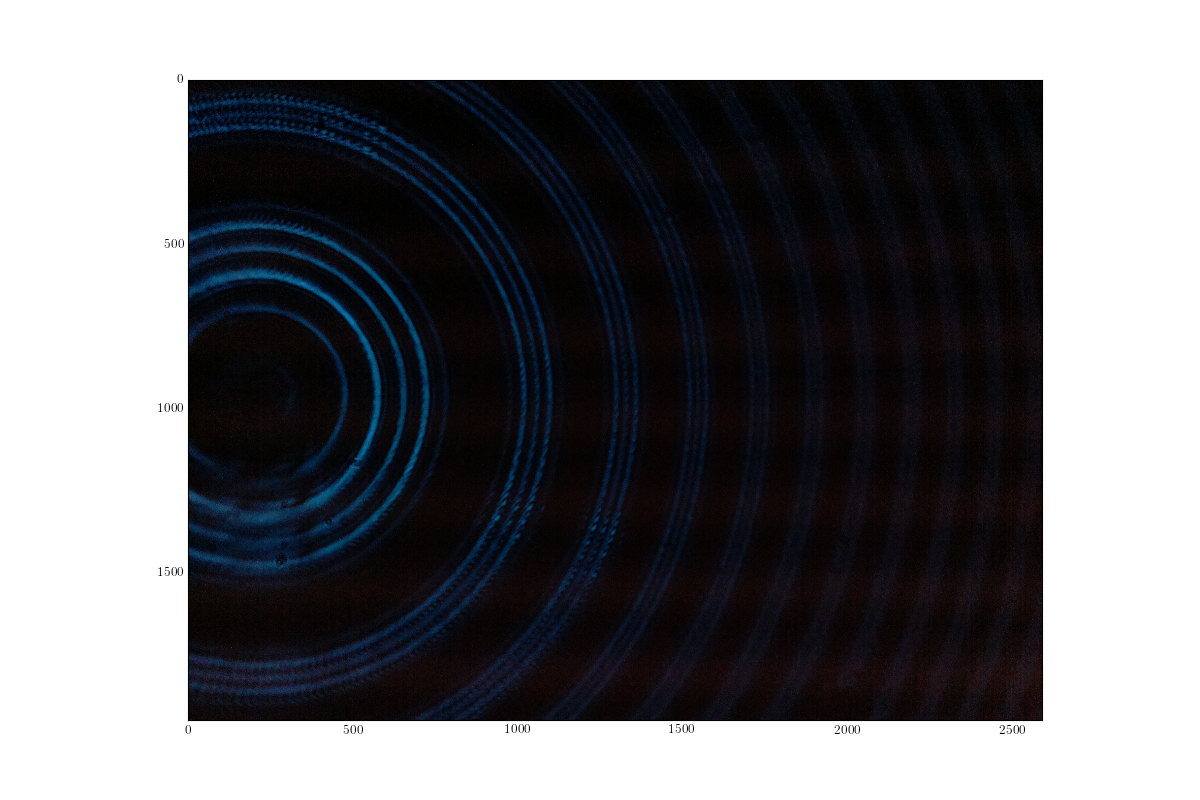

In [2]:
imshow(sixG)

<IPython.core.display.Javascript object>


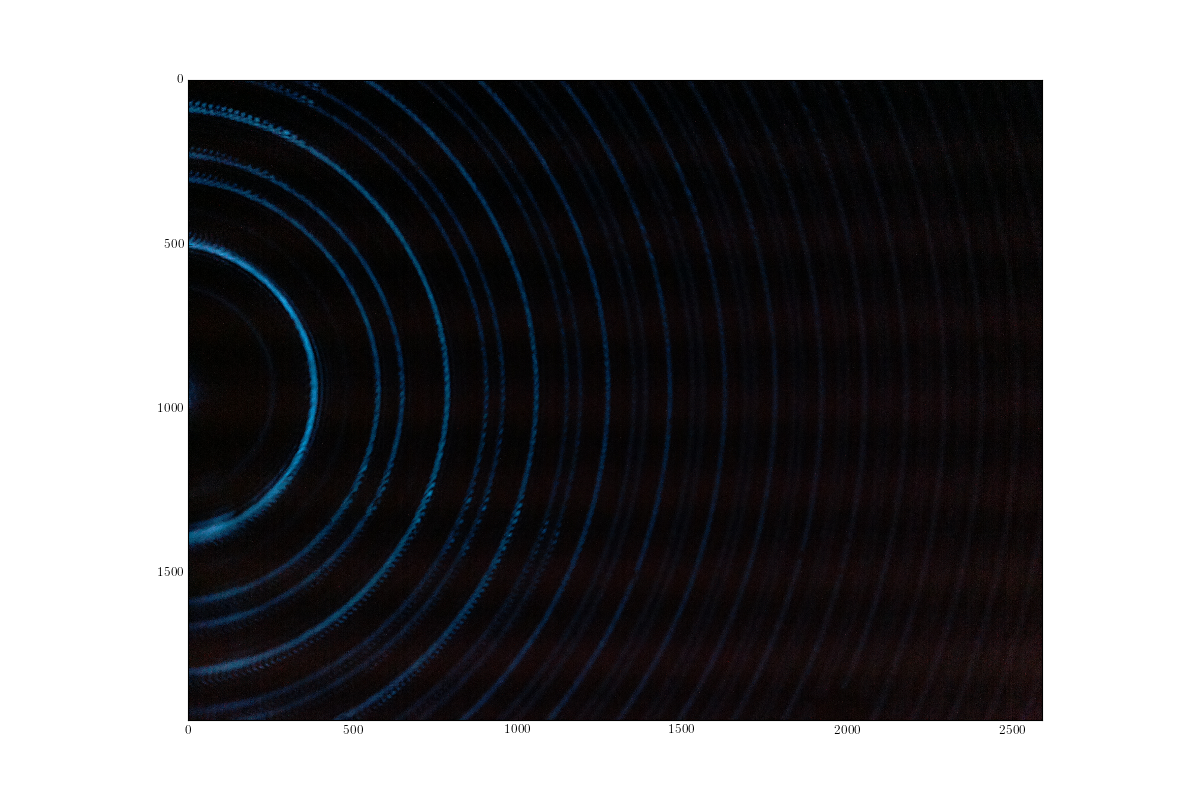

In [26]:
imshow(fourG)

<IPython.core.display.Javascript object>


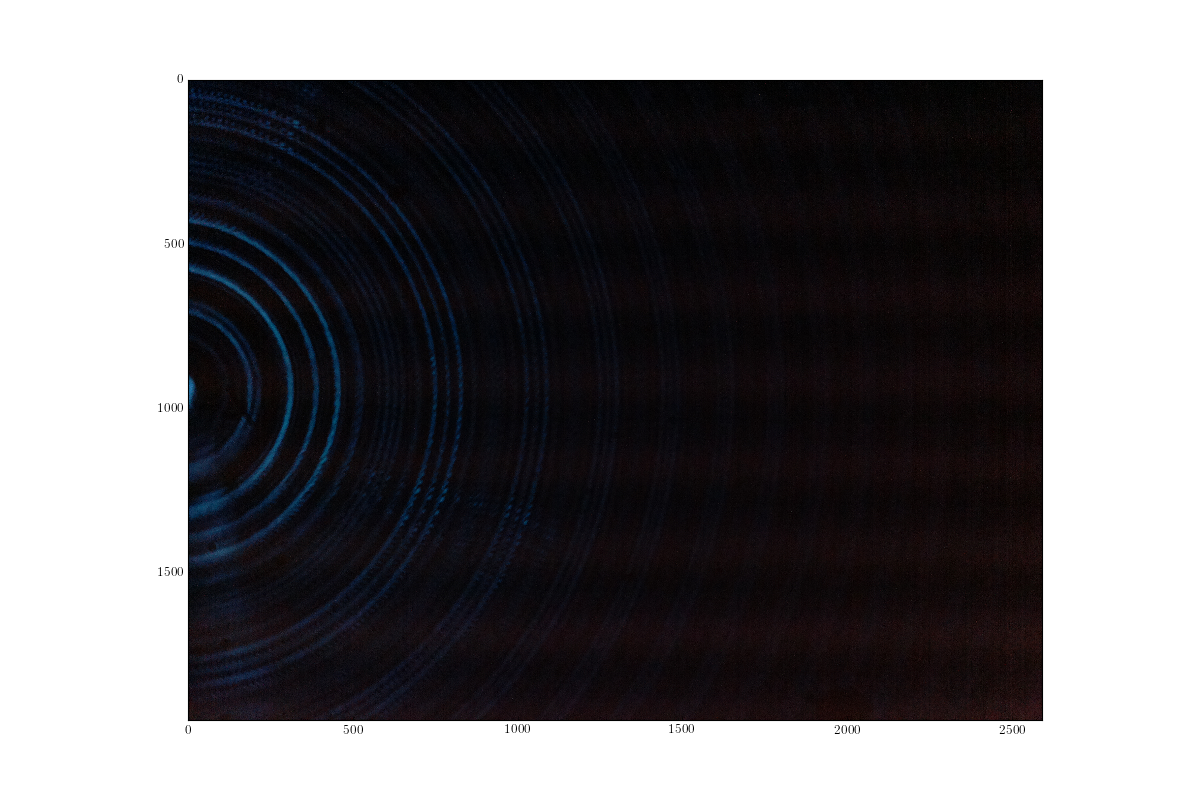

In [25]:
imshow(both)

<IPython.core.display.Javascript object>


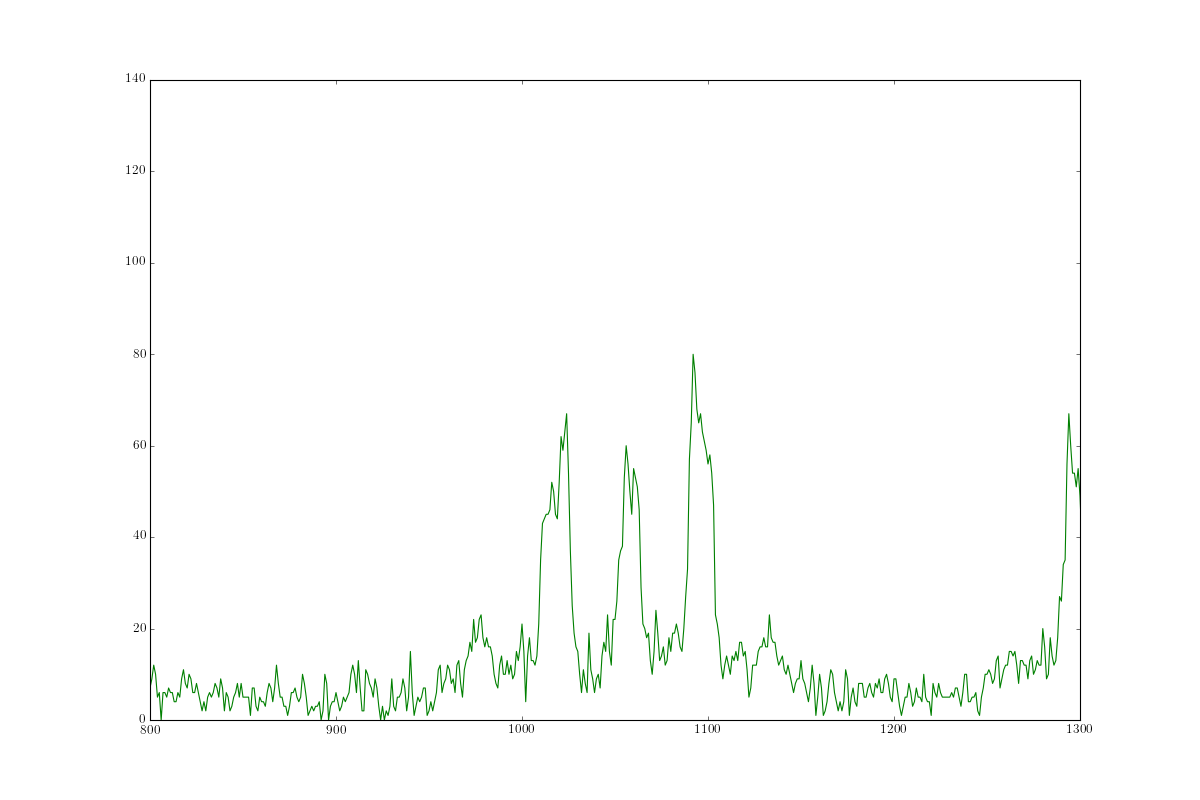

In [33]:
# make a plot of the rgb values vs  x pixels at y = 1000, basically horizontal cut 
#%matplotlib notebook

x, y, z =  carrier.shape


xdata = np.linspace(0,y-1,y)
ydata_r = carrier[1000,:,0]
ydata_g = carrier[1000,:,1]
ydata_b = carrier[1000,:,2]


#print ydata_r[1750:1900]

#plot(xdata,ydata_b, color = 'b')
#plot(xdata,ydata_b, color = 'b')

x, y, z =  sixG.shape


xdata_s = np.linspace(0,y-1,y)
ydata_r_s = sixG[1000,:,0]
ydata_g_s = sixG[1000,:,1]
ydata_b_s = sixG[1000,:,2]


plot(xdata,ydata_b_s, color = 'g')
#plot(xdata,ydata_b, color = 'b')

x, y, z =  fourG.shape


xdata_f = np.linspace(0,y-1,y)
ydata_r_f = fourG[1000,:,0]
ydata_g_f = fourG[1000,:,1]
ydata_b_f = fourG[1000,:,2]


#print ydata_r[1750:1900]
save_data = np.column_stack((xdata_s,ydata_b_s))
np.savetxt('Z:/Group_Share/Barium/Data/etalon_image/493/6GHz_data.txt',save_data, delimiter = ',')
#plot(xdata_s,ydata_b_f, color = 'g')
#plot(xdata,ydata_b, color = 'b')
xlim([800,1300])
show()


In [22]:
print "493nm Relative Power"
print "Carrier ~ ", '{:0.2f}'.format(60./(67+24+60+80+23))
print "5.8GHz 1st sideband ~ ", '{:0.2f}'.format(67./(67+24+60+80+23))
print "5.8GHz 2nd sideband ~ ",  '{:0.2f}'.format(23./(67+24+60+80+23))


493nm Relative Power
Carrier ~  0.24
5.8GHz 1st sideband ~  0.26
5.8GHz 2nd sideband ~  0.09


In [44]:
# Look at analytic formulat for sidebands. Find angles of transmission for fixed frequency

m  = 93807
n = 1.55
c = 2.99792458e8
d = 14935.e-6
f = 607.426010e12


print np.sqrt(n**2-1)*2*d*f/c
print n*2*d*f/c

print np.sqrt(n**2-(m*c/2/d/f)**2),(m*c/2/d/f)**2
angle = np.arcsin(np.sqrt(n**2-(m*c/2/d/f)**2))
print angle

71673.6198856
93807.9407054
0.00694148869406 2.40245181573
0.00694154444036


1.5707963267948966

### Saturation Intensity


In [28]:
# Calculate the saturation intensity and the saturation param for our beam
c = 2.99792458e8
f_493 = 607.425000e12
f_650 = 461.311700e12
h = 6.63e-34
lam_493 = c/f_493
lam_650 = c/f_650
tau_493 = 1./2/pi/15.2e6
tau_650 = 1./2/pi/4.9e6

Isat_493 = pi*h*c/3/lam_493**3/tau_493*1e-3 # mW/mm^2
Isat_650 = pi*h*c/3/lam_650**3/tau_650*1e-3 # mW/mm^2

print 'Isat 493nm ', '{:.3f}'.format(Isat_493)
print 'Isat 650nm ', '{:.3f}'.format(Isat_650)

r_493 = 330.e-3 # mm
r_650 = 430.e-3 # mm

p_493 = .84 # mW
p_650 = .51 # mW

I_493 = p_493/pi/r_493**2
I_650 = p_650/pi/r_650**2



S_493 = I_493/Isat_493
S_650 = I_650/Isat_650

print 'S 493nm ', '{:.1f}'.format(S_493)
print 'S 650nm ', '{:.1f}'.format(S_650)

fwhm_493 =  1/tau_493/2/pi*np.sqrt(1+S_493)
fwhm_650 =  1/tau_650/2/pi*np.sqrt(1+S_650)

print 'FWHM 493nm ', '{:.1f}'.format(fwhm_493/1e6) # MHz
print 'FWHM 650nm ', '{:.1f}'.format(fwhm_650/1e6) # MHz

Isat 493nm  0.165
Isat 650nm  0.023
S 493nm  14.8
S 650nm  37.6
FWHM 493nm  60.5
FWHM 650nm  30.4
